In [55]:
version()

'SageMath version 10.2, Release Date: 2023-12-03'

In [56]:
%display latex

Il faut trouver les solutions $\xi$ de l'équation transcendante :
\begin{equation}
    \xi\frac{d}{d\xi}J_{\lvert k \rvert}(\xi) + k\left( 1 + \frac{\xi^2 h^2}{n^2\pi^2 a^2}\right)^{1/2} J_{\lvert k \rvert}(\xi) = 0
\end{equation}
On peut écrire différemment l'équation précédente grâce aux propriétés des fonctions des fonctions de Bessel :
\begin{equation}
    \xi\left(-J_{\lvert k+1\rvert}(\xi) + \frac{k}{\xi}J_{\lvert k \rvert}(\xi)\right) + k\left( 1 + \frac{\xi^2 h^2}{n^2 \pi^2 a^2} \right)^{1/2}J_{\lvert k\rvert}(\xi) = 0
\end{equation}

On calcule ensuite la dérivée par rapport à $\xi$ 

In [74]:
from sage.symbolic.operators import *
from sage.functions.special import *

xi, k, h, n, a = var('xi k h n a')
J_k = bessel_J(abs(k), xi)

equation = xi*(-J_k + k/xi * bessel_J(abs(k+1), xi)) + k*(1 + (xi^2 * h^2)/(n^2 * pi^2 * a^2))^(1/2) * bessel_J(abs(k), xi) == 0

# Dérivée par rapport à xi
derivative_equation = diff(equation, xi)

show(derivative_equation)

-1/2*k*sqrt(h^2*xi^2/(pi^2*a^2*n^2) + 1)*(bessel_J(abs(k) + 1, xi) - bessel_J(abs(k) - 1, xi)) - 1/2*xi*(k*(bessel_J(abs(k + 1) + 1, xi) - bessel_J(abs(k + 1) - 1, xi))/xi + 2*k*bessel_J(abs(k + 1), xi)/xi^2 - bessel_J(abs(k) + 1, xi) + bessel_J(abs(k) - 1, xi)) + k*bessel_J(abs(k + 1), xi)/xi + h^2*k*xi*bessel_J(abs(k), xi)/(pi^2*a^2*n^2*sqrt(h^2*xi^2/(pi^2*a^2*n^2) + 1)) - bessel_J(abs(k), xi) == 0

In [75]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import jn
from scipy.optimize import newton

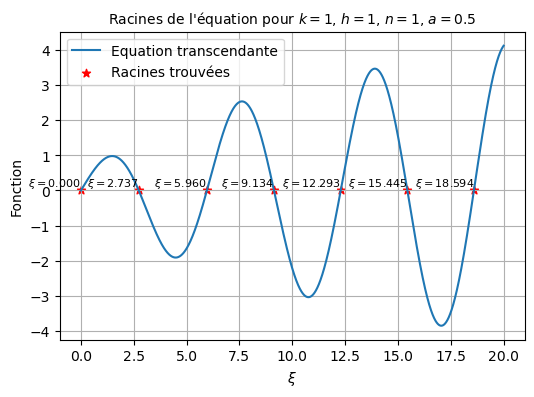

In [76]:
# Newton-Raphson   

# 1. Dérivée Numérique

# Paramètres
k = 1
h = 1
n = 1
a = 0.5

xi_values = np.linspace(0.001, 20, 10000)

def equation(xi, k, h, n, a):
    eq = xi * (-jn(np.abs(k+1), xi) + k/xi * jn(np.abs(k), xi)) + k * np.sqrt((1 + (xi**2 * h**2) / (n**2 * np.pi**2 * a**2))) * jn(np.abs(k), xi)
    return eq
    
def d_equation(xi, k, h, n, a):
    h = 1e-8
    return (equation(xi + h, k, h, n, a) - equation(xi, k, h, n, a)) / h
    
"""
# 2. Dérivée analytique

def derivee_equation(xi, k, h, n, a):
    d_eq = -1/2*k*np.sqrt(h^2*xi^2/(np.pi^2*a^2*n^2) + 1)*(jn(np.abs(k+1), xi) - jn(np.abs(k-1), xi)) - 1/2*xi*(k*(jn(np.abs(k + 1) + 1, xi) - jn(np.abs(k + 1) - 1, xi))/xi + 2*k*jn(np.abs(k + 1), xi)/xi^2 - jn(np.abs(k) + 1, xi) + jn(np.abs(k) - 1, xi)) + k*jn(np.abs(k + 1), xi)/xi + h^2*k*xi*jn(np.abs(k), xi)/(np.pi^2*a^2*n^2*np.sqrt(h^2*xi^2/(np.pi^2*a^2*n^2) + 1)) - jn(np.abs(k), xi)
    return d_eq
    
"""

def newton_raphson(k, h, n, a, nb_racines=7):
    racines = []
    xi_ini = 0.1
    
    for _ in range(nb_racines):
        xi_0_NR = newton(equation, xi_ini, args=(k, h, n, a),
                             fprime=d_equation, tol=1e-8, maxiter=100)
        racines.append(xi_0_NR)
        xi_ini = xi_0_NR + 3.0  # Utiliser la solution trouvée comme nouvelle supposition initiale
    
    return racines

# Fonction
equation_values = equation(xi_values, k, h, n, a)

# Racines
racines = newton_raphson(k, h, n, a, nb_racines=7)

# Tracer la fonction et les racines
plt.figure(figsize=(6, 4))
plt.plot(xi_values, equation_values, label='Equation transcendante')
plt.scatter(racines, [0]*len(racines), color='red', label='Racines trouvées', marker='*')
plt.title(f'Racines de l\'équation pour $k={k}$, $h={h}$, $n={n}$, $a={a:.1f}$', fontsize=10)
plt.xlabel('$\\xi$')
plt.ylabel('Fonction')
for xi in racines:
    plt.text(xi, 0, f'$\\xi={xi:.3f}$', fontsize=8, ha='right', va='bottom')
plt.legend()
plt.grid(True)
plt.show()


On peut maintenant regarder les valeurs correspondantes de 
\begin{equation}
    \lambda_{nmk} = 2 \left( 1 + \frac{\xi^2_{nmk}h^2}{n^2\pi^2 a^2}\right)^{-1/2}
\end{equation}
en fonction des racines trouvées

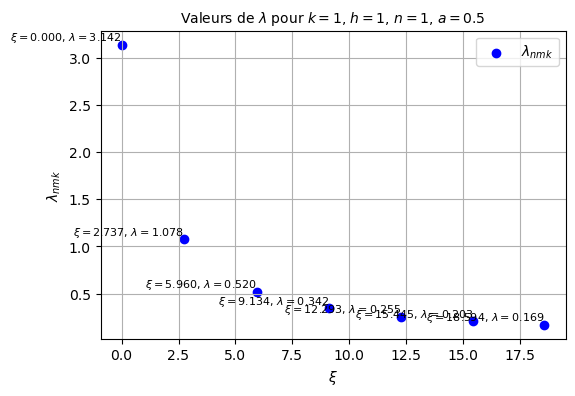

In [77]:
lambda_values = []
for xi_0 in racines : 
    lambda_nmk = 2 / np.sqrt((1 + (xi_0)**2 * h**2) / (n**2 * np.pi**2 * a**2))
    lambda_values.append(lambda_nmk)
"""
for i in range(len(racines)):
    print(f"La valeur de $\\xi$[{i}] à $\\lambda$[{i}]: {racines[i]} -> {lambda_values[i]}")
"""
# Tracer le graphe des valeurs de lambda en fonction des racines
plt.figure(figsize=(6, 4))
plt.scatter(racines, lambda_values, color='blue', label='$\\lambda_{nmk}$')
plt.title(f'Valeurs de $\\lambda$ pour $k={k}$, $h={h}$, $n={n}$, $a={a:.1f}$', fontsize=10)
plt.xlabel('$\\xi$')
plt.ylabel('$\\lambda_{nmk}$')
for xi, lambd in zip(racines, lambda_values):
    plt.text(xi, lambd, f'$\\xi={xi:.3f}$, $\\lambda={lambd:.3f}$', fontsize=8, ha='right', va='bottom')
plt.legend()
plt.grid(True)
plt.show()